In [1]:
import os
from PIL import Image

import time
import numpy as np
import tensorflow as tf
import pandas as pd


from user import User
from average import Average
from tensorflow import keras

from graphing import *
from file_related import *
from inits import *
from trainers import *
SEED = 0

# import os
# os.environ['PYTHONHASHSEED']=str(SEED)
# np.random.seed(SEED)
# import random
# random.seed(SEED)
# tf.set_random_seed(SEED)
# could need to force keras to not use parallelism, see documentation

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:

# https://www.kaggle.com/prasunroy/natural-images
data_dir = "../testing/data/natural_images/"

CLASSES, files = map_images(data_dir)

In [3]:
averaging_methods = [Average.all,Average.std_dev,Average.weighted_avg]


In [4]:
def train(model, toy=False):
        """
        Train the model
        """
        if toy:
            epochs=3
            steps_per_epoch=20
            validation_steps=2
        else:
            epochs=30
#             steps_per_epoch=100
            steps_per_epoch=30
#             steps_per_epoch=10
            validation_steps=5
            
        # We'll stop training if no improvement after some epochs
        earlystopper = EarlyStopping(monitor='val_acc', patience=10, verbose=1)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
        # Save the best model during the traning
        checkpointer = ModelCheckpoint('best_model1.h5'
                                        ,monitor='val_acc'
                                        ,verbose=1
                                        ,save_best_only=True
                                        ,save_weights_only=True)
        # Train
        training = model.fit(x_train, y_train
                                ,epochs=epochs
                                ,steps_per_epoch=steps_per_epoch
                                ,validation_data=(x_val, y_val)
                                ,validation_steps=validation_steps
                                ,callbacks=[earlystopper, checkpointer, reduce_lr], verbose=3)
        # Get the best saved weights
        model.load_weights('best_model1.h5')
        return training

In [5]:
DEVICE = '/gpu:0'
ROUNDS = 32 # after about 30-40, it seems to settle down with epochs being 16
EPOCHS = 16

In [36]:
# forces tensorfor to the a particular device to run things
#      # return a dictionary of users with data
users_all = init_users_image(files, seed = SEED)
train_fed(users = users_all, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "central",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_method = Average.all,
          averaging_post = True,
          averaging_metric = "accuracy")

    # return a dictionary of users with data
#     users_all_2, global_user = init_users(df = df, 
#                                         averaging_methods = averaging_methods, 
#                                         seed = SEED)
#     train_fed(users = users_all_2, rounds = ROUNDS,
#               epochs = EPOCHS,
              
#               strat = "personalised",
#               train_user_verbose = False,
#               train_user_verbose_evaluate = False,
#               train_user_verbose_fit = False,
#               averaging_post = True,
#               averaging_metric = "accuracy")
    
#      print(len(users_all[2].get_history_metrics()["sparse_categorical_accuracy"]))
#     draw_graphs(users_all[2])   

********************************  0   ********************************
0 [9.774694760640463, 0.040650405]
1 [7.04132578290742, 0.06896552]
2 [18.982430458068848, 0.0390625]
3 [11.439511427642605, 0.021276595]
4 [5.988216416877613, 0.22807017]
5 [3.9954597552617392, 0.4375]
6 [13.931021997145006, 0.027972028]
7 [8.573457371104848, 0.06818182]
******************************** DONE ********************************
********************************  1   ********************************
0 [2.018914100600452, 0.3902439]
1 [2.06506714327582, 0.13793103]
2 [2.0948326587677, 0.0625]
3 [2.0783451330577227, 0.09929078]
4 [2.0429416790343167, 0.28070176]
5 [2.108582470152113, 0.083333336]
6 [2.0261066460109256, 0.6993007]
7 [2.0588857621857612, 0.12878788]
******************************** DONE ********************************
********************************  2   ********************************
0 [0.5799291347100483, 0.8130081]
1 [1.182832956314087, 0.57758623]
2 [1.5838533341884613, 0.3515625]
3 

All
For central
Final values for Pre-fit accuracy
Position                   Pre
Round                       31
Average               0.819616
Standard Deviation    0.115853
Minimum               0.578947
Maximum                 0.9375
Name: 62, dtype: object
Final values for Post-fit accuracy
Position                   Post
Round                        31
Average                0.916871
Standard Deviation    0.0352535
Minimum                 0.84375
Maximum                0.958042
Name: 63, dtype: object



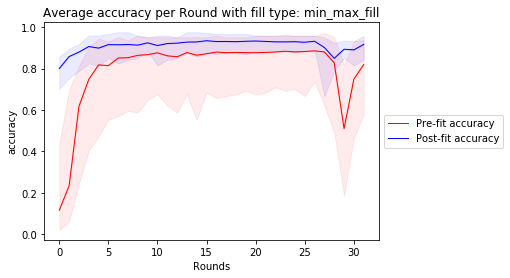

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.894309
3     1     0.836207
5     2     0.781250
7     3     0.886525
9     4     0.578947
11    5     0.937500
13    6     0.930070
15    7     0.712121
Averaged: 0.8196161389350891

Final accuracy for Post-fit data
   User  Final Value
0     0     0.951219
2     1     0.905172
4     2     0.843750
6     3     0.929078
8     4     0.885965
10    5     0.937500
12    6     0.958042
14    7     0.924242
Averaged: 0.9168711602687836



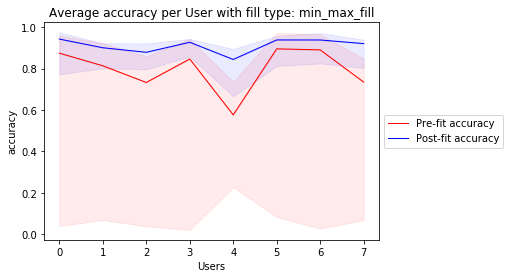

<Figure size 432x288 with 0 Axes>

In [37]:
ignore_first_n = 0
final_values = True

GRAPHING_METRIC = "accuracy"


print("All")

# print("For p2p")


# df_avg_round_stats_acc = avg_round_stats(users_all_2, 
#                                          ignore_first_n = ignore_first_n, 
#                                          min_max_fill = True, 
#                                          metric = "accuracy",
#                                          final_values = final_values)
# df_avg_user_stats_acc = avg_user_stats(users_all_2, 
#                                        ignore_first_n = ignore_first_n, 
#                                        min_max_fill = True, 
#                                        metric = "accuracy",
#                                        final_values = final_values)
print("For central")


df_avg_round_stats_acc = avg_round_stats(users_all, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = GRAPHING_METRIC,
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_all, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = GRAPHING_METRIC,
                                       final_values = final_values)

In [38]:
averaging_methods = [Average.std_dev]
# return a dictionary of users with data
users_std_dev = init_users_image(files, seed = SEED)
train_fed(users = users_std_dev, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "central",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_method =  Average.std_dev,
         averaging_post = True,
          averaging_metric = "accuracy")

# return a dictionary of users with data
users_std_dev_2 = init_users_image(files, seed = SEED)
train_fed(users = users_std_dev_2, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "personalised",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_post = True,
          averaging_metric = "accuracy")



********************************  0   ********************************
0 [9.774694760640463, 0.040650405]
1 [7.04132578290742, 0.06896552]
2 [18.982430458068848, 0.0390625]
3 [11.439511427642605, 0.021276595]
4 [5.988216416877613, 0.22807017]
5 [3.9954597552617392, 0.4375]
6 [13.931021997145006, 0.027972028]
7 [8.573457371104848, 0.06818182]
User 4: 0.719298243522644 < 0.770132430410289
******************************** DONE ********************************
********************************  1   ********************************
0 [1.9951886336008708, 0.41463414]
1 [2.0434344225916368, 0.33620688]
2 [2.0856072306632996, 0.0859375]
3 [2.103159192606067, 0.09219858]
4 [2.0635622551566675, 0.10526316]
5 [2.0887916882832847, 0.18055555]
6 [2.0269597310286303, 0.67832166]
7 [2.069057356227528, 0.121212125]
User 1: 0.8103448152542114 < 0.8203480794555433
User 4: 0.8157894611358643 < 0.8203480794555433
User 7: 0.810606062412262 < 0.8203480794555433
******************************** DONE *********

Std deviation
For central
Final values for Pre-fit accuracy
Position                   Pre
Round                       31
Average               0.869484
Standard Deviation    0.139374
Minimum               0.508772
Maximum               0.958333
Name: 62, dtype: object
Final values for Post-fit accuracy
Position                   Post
Round                        31
Average                0.929704
Standard Deviation    0.0325785
Minimum                0.850877
Maximum                0.964539
Name: 63, dtype: object



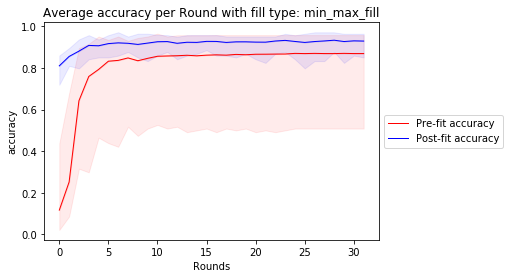

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.943089
3     1     0.896552
5     2     0.867188
7     3     0.950355
9     4     0.508772
11    5     0.958333
13    6     0.930070
15    7     0.901515
Averaged: 0.8694842010736465

Final accuracy for Post-fit data
   User  Final Value
0     0     0.943089
2     1     0.922414
4     2     0.921875
6     3     0.964539
8     4     0.850877
10    5     0.951389
12    6     0.944056
14    7     0.939394
Averaged: 0.9297041371464729



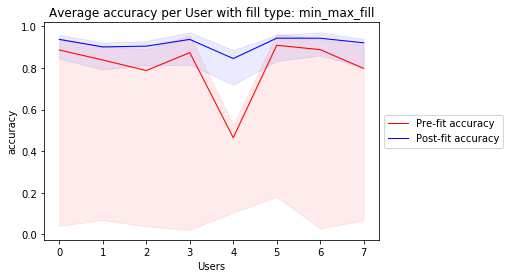

For p2p
Final values for Pre-fit accuracy
Position                    Pre
Round                        31
Average                0.889362
Standard Deviation    0.0864045
Minimum                0.675439
Maximum                0.972222
Name: 62, dtype: object
Final values for Post-fit accuracy
Position                   Post
Round                        31
Average                0.927284
Standard Deviation    0.0257039
Minimum                0.868421
Maximum                0.965278
Name: 63, dtype: object



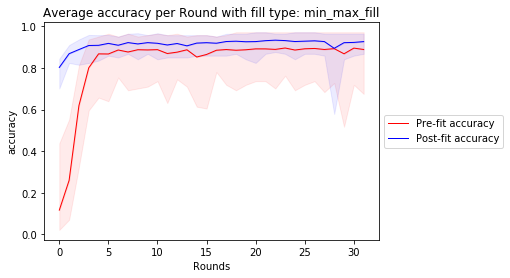

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.910569
3     1     0.922414
5     2     0.882812
7     3     0.936170
9     4     0.675439
11    5     0.972222
13    6     0.944056
15    7     0.871212
Averaged: 0.8893618062138557

Final accuracy for Post-fit data
   User  Final Value
0     0     0.918699
2     1     0.931035
4     2     0.929688
6     3     0.943262
8     4     0.868421
10    5     0.965278
12    6     0.930070
14    7     0.931818
Averaged: 0.9272838234901428



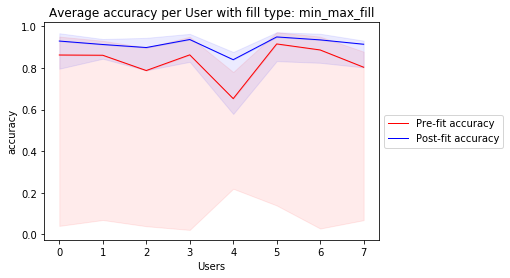

<Figure size 432x288 with 0 Axes>

In [39]:
ignore_first_n = 0
final_values = True
GRAPHING_METRIC = "accuracy"

print("Std deviation")
print("For central")


df_avg_round_stats_acc = avg_round_stats(users_std_dev, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = GRAPHING_METRIC,
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_std_dev, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = GRAPHING_METRIC,
                                       final_values = final_values)
print("For p2p")


df_avg_round_stats_acc = avg_round_stats(users_std_dev_2, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = GRAPHING_METRIC,
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_std_dev_2, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = GRAPHING_METRIC,
                                       final_values = final_values)


# print(users_std_dev[1].get_history_metrics())


In [6]:
averaging_methods = [Average.weighted_avg]

# return a dictionary of users with data
users_weighted_avg = init_users_image(files, seed = SEED)
train_fed(users = users_weighted_avg, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "central",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_method = Average.weighted_avg,
          averaging_post = True,
          averaging_metric = "accuracy")

# return a dictionary of users with data
users_weighted_avg_2 = init_users_image(files, seed = SEED)
train_fed(users = users_weighted_avg_2, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "personalised",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_post = True,
          averaging_metric = "accuracy")

********************************  0   ********************************
0 [9.774694446625748, 0.040650405]
1 [7.04132578290742, 0.06896552]
2 [18.982430458068848, 0.0390625]
3 [11.439511427642605, 0.021276595]
4 [5.988216416877613, 0.22807017]
5 [3.9954597552617392, 0.4375]
6 [13.931021997145006, 0.027972028]
7 [8.573457371104848, 0.06818182]
******************************** DONE ********************************
********************************  1   ********************************
0 [2.0034314364921757, 0.4796748]
1 [2.0595144567818475, 0.1637931]
2 [2.0909047722816467, 0.0625]
3 [2.0810986951733312, 0.09219858]
4 [2.0487514964321205, 0.22807017]
5 [2.0978184011247425, 0.15277778]
6 [2.0353087812036903, 0.6433566]
7 [2.065568952849417, 0.121212125]
******************************** DONE ********************************
********************************  2   ********************************
0 [0.6144196706089547, 0.8130081]
1 [1.0975294853078907, 0.63793105]
2 [1.70236137509346, 0.28125]


Weighted average
For central
Final values for Pre-fit accuracy
Position                   Pre
Round                       31
Average               0.639407
Standard Deviation    0.187622
Minimum               0.333333
Maximum               0.846154
Name: 62, dtype: object
Final values for Post-fit accuracy
Position                   Post
Round                        31
Average                0.865209
Standard Deviation    0.0307525
Minimum                0.793103
Maximum                0.890625
Name: 63, dtype: object



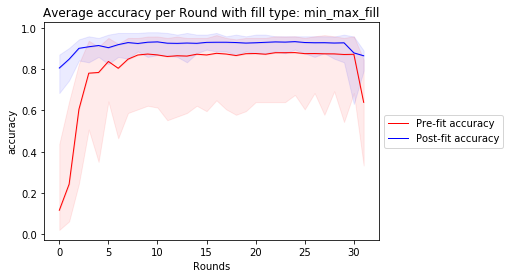

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.772358
3     1     0.715517
5     2     0.398438
7     3     0.737589
9     4     0.333333
11    5     0.819444
13    6     0.846154
15    7     0.492424
Averaged: 0.6394071169197559

Final accuracy for Post-fit data
   User  Final Value
0     0     0.886179
2     1     0.793103
4     2     0.890625
6     3     0.879433
8     4     0.850877
10    5     0.881944
12    6     0.853147
14    7     0.886364
Averaged: 0.8652089983224869



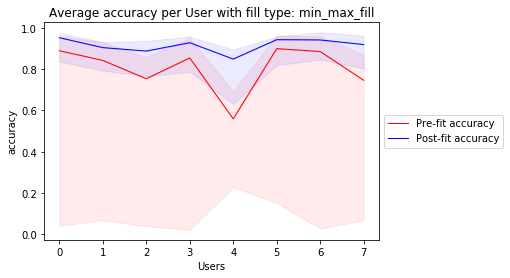

For p2p
Final values for Pre-fit accuracy
Position                    Pre
Round                        31
Average                0.888332
Standard Deviation    0.0926624
Minimum                0.666667
Maximum                0.965035
Name: 62, dtype: object
Final values for Post-fit accuracy
Position                   Post
Round                        31
Average                0.931224
Standard Deviation    0.0224292
Minimum                0.894737
Maximum                0.958333
Name: 63, dtype: object



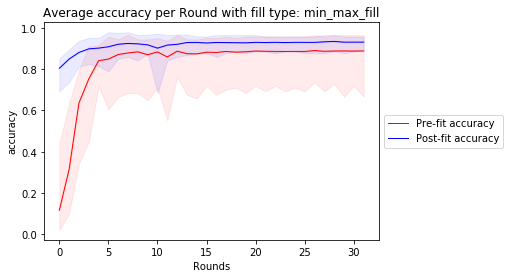

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.951219
3     1     0.913793
5     2     0.859375
7     3     0.936170
9     4     0.666667
11    5     0.958333
13    6     0.965035
15    7     0.856061
Averaged: 0.8883316740393639

Final accuracy for Post-fit data
   User  Final Value
0     0     0.951219
2     1     0.905172
4     2     0.921875
6     3     0.936170
8     4     0.894737
10    5     0.958333
12    6     0.958042
14    7     0.924242
Averaged: 0.9312239587306976



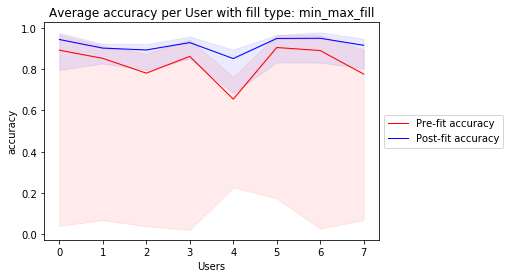

<Figure size 432x288 with 0 Axes>

In [7]:
ignore_first_n = 0
final_values = True
GRAPHING_METRIC = "accuracy"

print("Weighted average")

print("For central")


df_avg_round_stats_acc = avg_round_stats(users_weighted_avg, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = GRAPHING_METRIC,
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_weighted_avg, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = GRAPHING_METRIC,
                                       final_values = final_values)

print("For p2p")


df_avg_round_stats_acc = avg_round_stats(users_weighted_avg_2, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = GRAPHING_METRIC,
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_weighted_avg_2, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = GRAPHING_METRIC,
                                       final_values = final_values)


In [8]:
users_local_only = init_users_image(files, seed = SEED)
train_fed(users = users_local_only, rounds = ROUNDS,
          epochs = EPOCHS,

          strat = "local_trainings_only",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_post = True,
          averaging_metric = "accuracy")
        
#     print("Global user training and validation")

#     global_user.train(epochs = EPOCHS*ROUNDS,
#        verbose_fit = False,
#        verbose_evaluate = False,
#     )

********************************  0   ********************************
0 [9.774694446625748, 0.040650405]
1 [7.04132578290742, 0.06896552]
2 [18.982430458068848, 0.0390625]
3 [11.439511427642605, 0.021276595]
4 [5.988216416877613, 0.22807017]
5 [3.9954597552617392, 0.4375]
6 [13.931021997145006, 0.027972028]
7 [8.573457371104848, 0.06818182]
******************************** DONE ********************************
********************************  1   ********************************
0 [0.47335693603608664, 0.8292683]
1 [0.5709157442224437, 0.7844828]
2 [0.6281297113746405, 0.8046875]
3 [0.4641250397296662, 0.8439716]
4 [0.9857343602598759, 0.69298244]
5 [0.4828709363937378, 0.875]
6 [0.40503219957951897, 0.86013985]
7 [0.6881157821326545, 0.8030303]
******************************** DONE ********************************
********************************  2   ********************************
0 [0.41402152495655586, 0.91056913]
1 [0.6064939909967882, 0.87068963]
2 [0.5461606690660119, 0.8828

Local training only
Final values for Pre-fit accuracy
Position                    Pre
Round                        31
Average                0.875199
Standard Deviation    0.0515128
Minimum                0.754386
Maximum                0.930556
Name: 62, dtype: object
Final values for Post-fit accuracy
Position                   Post
Round                        31
Average                0.875409
Standard Deviation    0.0484426
Minimum                0.763158
Maximum                0.930556
Name: 63, dtype: object



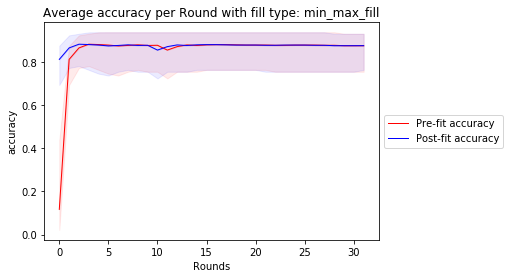

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.869919
3     1     0.862069
5     2     0.875000
7     3     0.907801
9     4     0.754386
11    5     0.930556
13    6     0.923077
15    7     0.878788
Averaged: 0.8751994222402573

Final accuracy for Post-fit data
   User  Final Value
0     0     0.869919
2     1     0.862069
4     2     0.875000
6     3     0.900709
8     4     0.763158
10    5     0.930556
12    6     0.923077
14    7     0.878788
Averaged: 0.8754093945026398



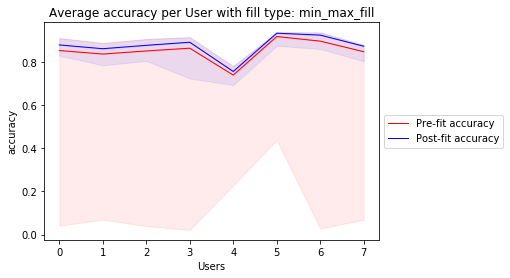

<Figure size 432x288 with 0 Axes>

In [9]:
ignore_first_n = 0
final_values = True
GRAPHING_METRIC = "accuracy"


print("Local training only")


df_avg_round_stats_acc = avg_round_stats(users_local_only, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = GRAPHING_METRIC,
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_local_only, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = GRAPHING_METRIC,
                                       final_values = final_values)
# draw_graphs(users_all_2[2])

# print("Global user")
# draw_graphs(global_user)
# global_user.evaluate(verbose=False)

In [13]:
for user in users_local_only.values():
    draw_graphs(user)

In [32]:
global_user = init_users_image(files, seed = SEED, return_global_user=True)
print(global_user.get_train_data().dtype)
global_user.get_model().summary()
global_user.train(
    epochs = ROUNDS*EPOCHS,
    verbose_fit = True,
    verbose_evaluate = False
)


uint8
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_310 (Conv2D)          (None, 78, 78, 32)        896       
_________________________________________________________________
conv2d_311 (Conv2D)          (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_186 (MaxPoolin (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_312 (Conv2D)          (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_187 (MaxPoolin (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_188 (MaxPoolin (None, 8, 8, 128) 

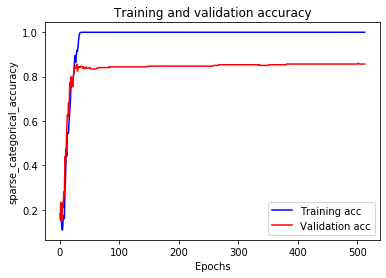

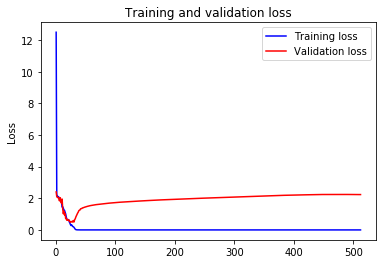

<Figure size 432x288 with 0 Axes>

In [33]:
draw_graphs(global_user)

# for user in u.values():
user = users_local_only[4]
for i, user in enumerate(users_local_only.values()):
    print(f"{CLASSES[i]:<10} -> {user.get_id()}: {np.unique(user.get_train_class(), return_counts=True)}")
    
print(f"{' ':<10} -> {global_user.get_id()}: {np.unique(global_user.get_train_class(), return_counts=True)}")
print(f"{' ':<10} -> {global_user.get_id()}: {np.unique(global_user.get_test_class(), return_counts=True)}")
print(f"{' ':<10} -> {global_user.get_id()}: {np.unique(global_user.get_val_class(), return_counts=True)}")


In [35]:
global_user.evaluate(verbose=False)

[2.136448685305263, 0.8722382]